<a href="https://colab.research.google.com/github/isabelemoura/Estudos_IA/blob/main/Atividade_3_IA_Dijkstra_Atualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bem-vindo ao programa de caminho mais curto!
Insira o ponto de início (ex: P1): P1
Insira o ponto de destino (ex: Loja): Loja
Caminho mais curto entre P1 e Loja: P1 -> D -> G -> Loja
Distância total: 24 km


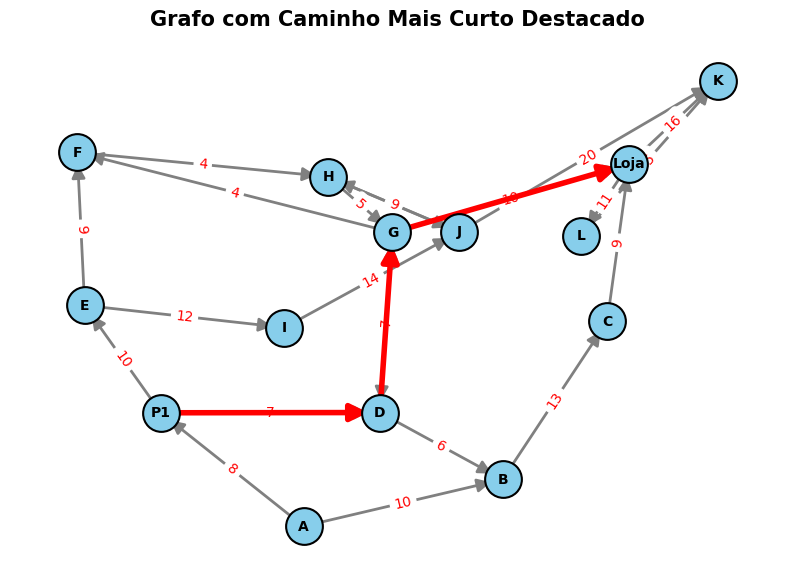

In [6]:
import heapq  # Biblioteca necessária para o algoritmo de Dijkstra
import networkx as nx
import matplotlib.pyplot as plt

# Grafo representando o mapa com as distâncias fornecidas
grafo = {
    'A': {'P1': 8, 'B': 10},
    'B': {'C': 13},
    'C': {'Loja': 9},
    'P1': {'D': 7, 'E': 10},
    'D': {'B': 6, 'G': 7},
    'E': {'F': 9, 'I': 12},
    'F': {'H': 4},
    'G': {'D': 7, 'F': 4, 'Loja': 10},
    'H': {'J': 9, 'G': 5},
    'I': {'J': 14},
    'J': {'H': 9, 'K': 20},
    'K': {},
    'L': {'K': 5},
    'Loja': {'K': 16, 'L': 11},
}

# Função que implementa o algoritmo de Dijkstra para encontrar o caminho mais curto
def encontrar_caminho_mais_curto(grafo, inicio, fim):
    fila = [(0, inicio)]
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[inicio] = 0
    caminho = {nodo: None for nodo in grafo}
    visitados = set()

    while fila:
        dist_atual, nodo_atual = heapq.heappop(fila)

        if nodo_atual in visitados:
            continue

        visitados.add(nodo_atual)

        if nodo_atual == fim:
            break

        for vizinho, peso in grafo[nodo_atual].items():
            nova_distancia = dist_atual + peso
            if nova_distancia < distancias[vizinho]:
                distancias[vizinho] = nova_distancia
                caminho[vizinho] = nodo_atual
                heapq.heappush(fila, (nova_distancia, vizinho))

    caminho_final = []
    nodo = fim
    while nodo is not None:
        caminho_final.insert(0, nodo)
        nodo = caminho[nodo]

    if distancias[fim] == float('inf'):
        return None, float('inf')
    return caminho_final, distancias[fim]

# Função para criar o grafo para visualização
def create_graph():
    G = nx.DiGraph()  # Grafo direcionado
    for origem, destinos in grafo.items():
        for destino, peso in destinos.items():
            G.add_edge(origem, destino, weight=peso)
    return G

# Função para visualizar o grafo com melhorias de estilo
def visualize_graph(G, shortest_path=None):
    plt.figure(figsize=(10, 7))  # Tamanho da figura

    pos = nx.spring_layout(G)  # Layout de molas para uma distribuição visual melhor
    labels = nx.get_edge_attributes(G, 'weight')

    # Desenhar nós com cor e tamanho personalizados
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black', linewidths=1.5)

    # Desenhar arestas com setas, ajustando a espessura e cor
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=2)

    # Desenhar rótulos dos nós
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', font_weight='bold')

    # Desenhar rótulos de peso das arestas
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

    # Destacar o caminho mais curto em vermelho se houver
    if shortest_path:
        edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=4, arrows=True, arrowsize=25)

    plt.title("Grafo com Caminho Mais Curto Destacado", fontsize=15, fontweight='bold')
    plt.axis('off')  # Remover os eixos para melhor visualização
    plt.show()

# Função principal que executa a lógica
def encontrar_melhor_caminho():
    print("Bem-vindo ao programa de caminho mais curto!")

    inicio = input("Insira o ponto de início (ex: P1): ")
    fim = input("Insira o ponto de destino (ex: Loja): ")

    caminho, distancia = encontrar_caminho_mais_curto(grafo, inicio, fim)

    if caminho:
        print(f"Caminho mais curto entre {inicio} e {fim}: {' -> '.join(caminho)}")
        print(f"Distância total: {distancia} km")

        # Criar e visualizar o grafo
        G = create_graph()
        visualize_graph(G, caminho)
    else:
        print(f"Não foi possível encontrar um caminho entre {inicio} e {fim}")

# Executar o programa
if __name__ == "__main__":
    encontrar_melhor_caminho()
